# Iris Dataset Analysis
---


The Fisher's Iris dataset, also known as the Iris flower dataset, is a well-known resource in the field of data analysis. It consists of 150 observations of iris flowers, detailing four key attributes: sepal length, sepal width, petal length, and petal width. These attributes are recorded for three different species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Through this project, I aim to explore data visualization and statistical analysis to gain insights into the patterns and relationships within the dataset, ultimately enhancing our understanding and skills in data analysis.

## Imports and Dataset Load
---

In [2]:
# import libraries relevant to the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the data
data = pd.read_csv('iris.data')

## Data Understanding
---
- Dataframe shape
- Head and Tail of the dataset
- Data Types
- Summary

In [4]:
data.shape # it shows the number of rows and columns in the dataset

(150, 5)

In [11]:
# Data check for general look
data.head(150)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
# Data types of the columns
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
species             object
dtype: object

In [20]:
# Check if we have any missing values
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [17]:
# Check the species of the iris flower in the dataset to understand the distribution
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

I have a dataset consisting of 5 columns and 150 rows. Only one column contains non-numeric values, while the remaining columns are float numbers representing the dimensions of the sepal and petal parts of the flower. When I examine the value count of the 'species' column, I observe that there are 3 different species, with the observations evenly distributed among them.

### Let's look at the summary of each variable.
---

In [19]:
# Check the descriptive statistics of the dataset for numerical columns
data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


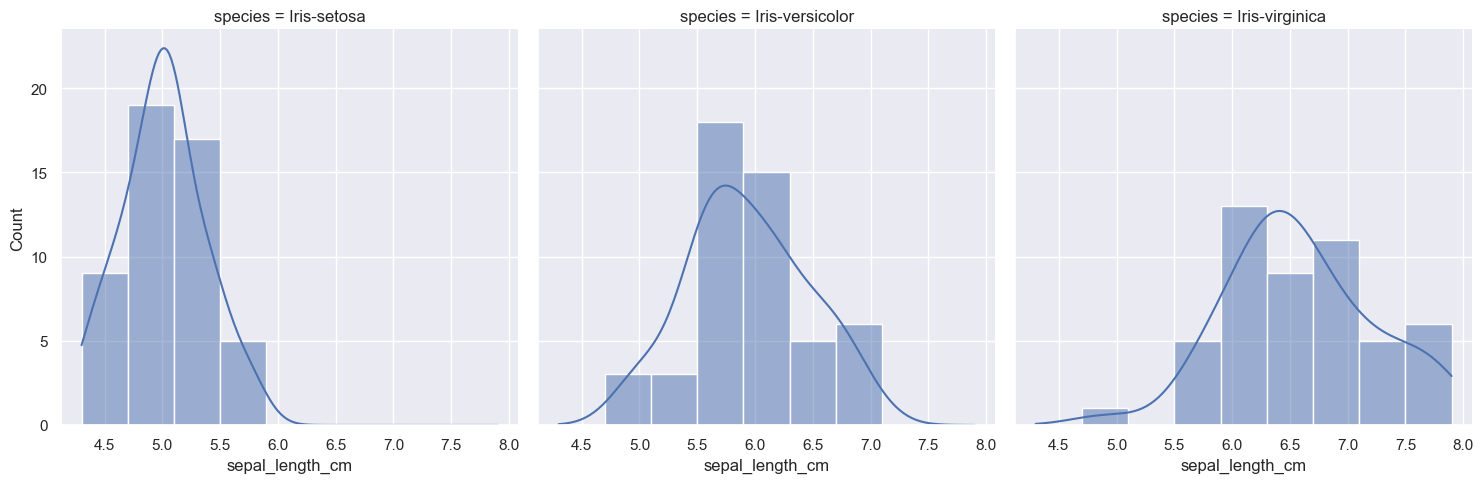

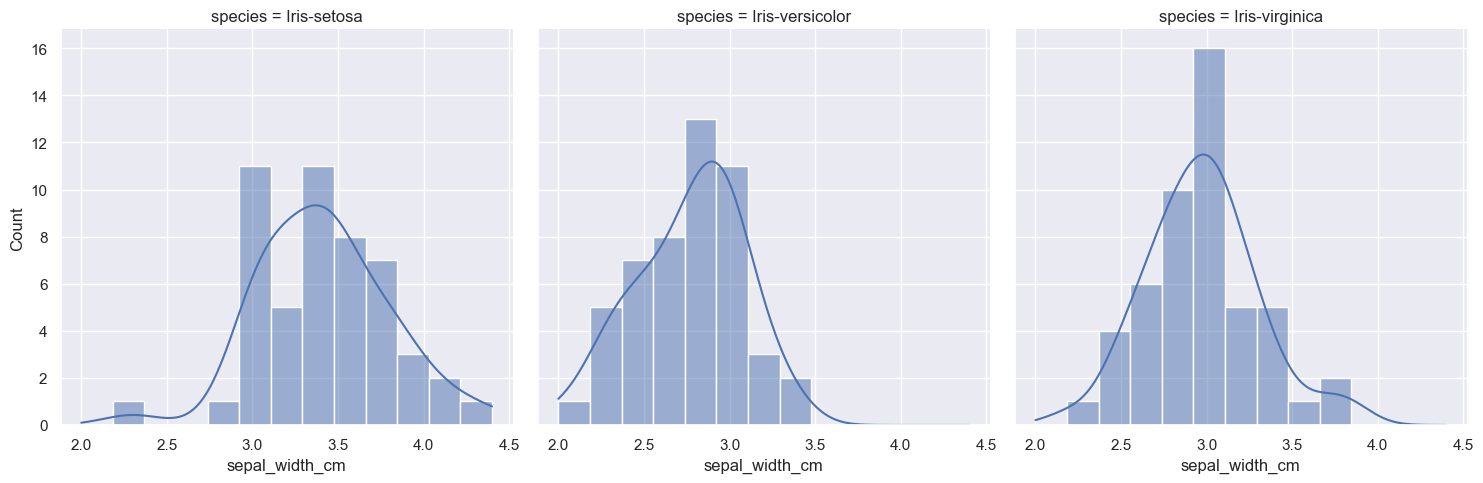

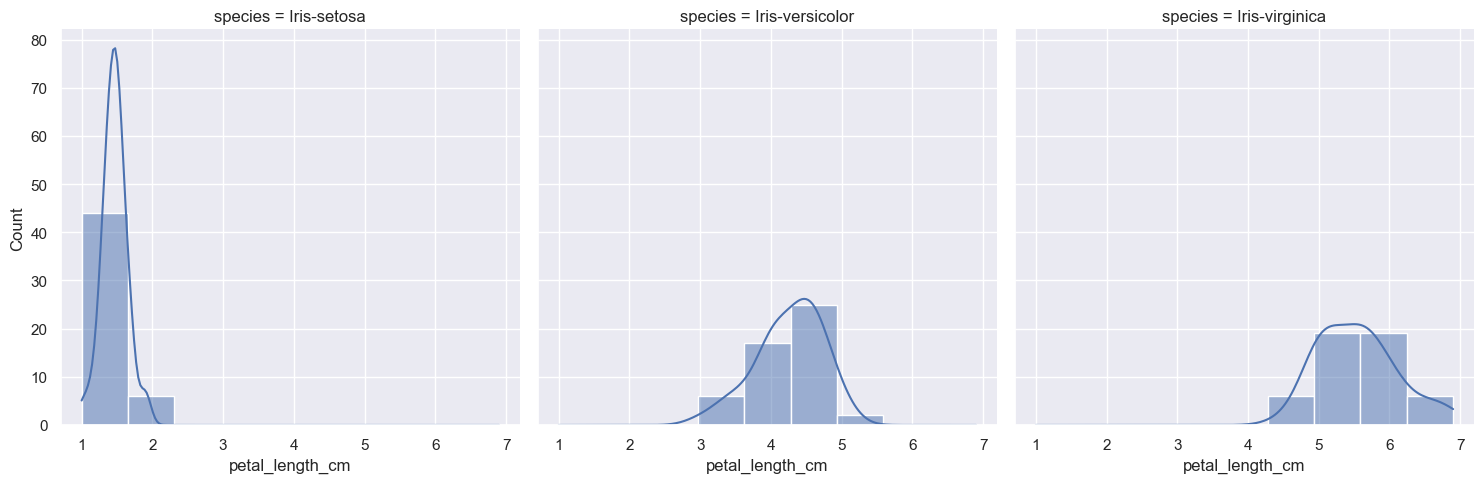

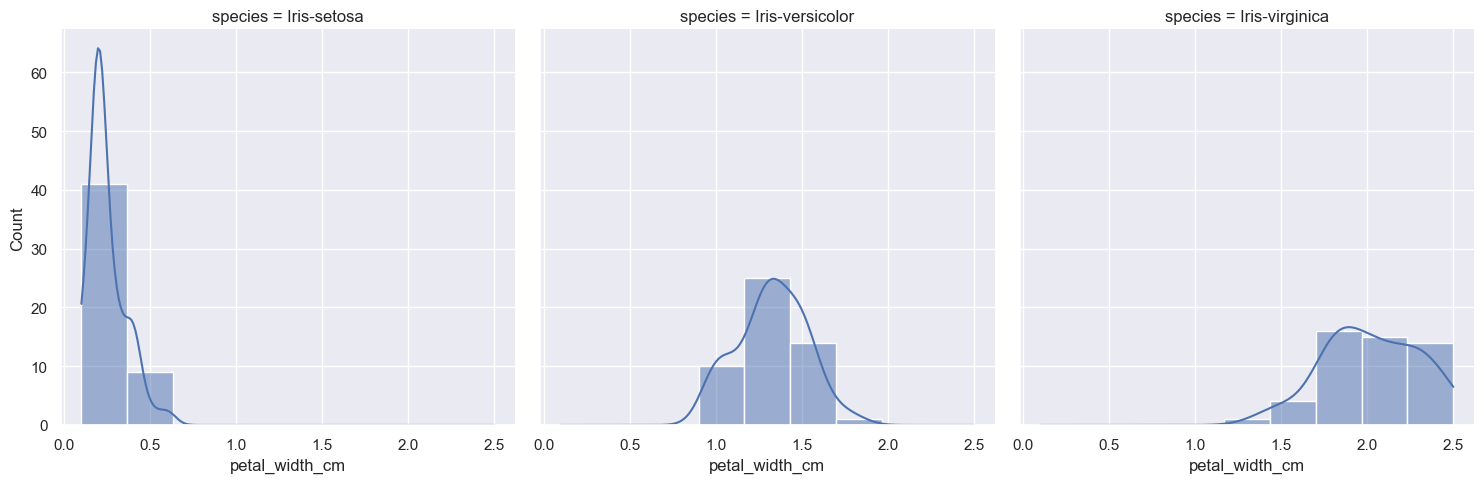

In [42]:
# Variables distribution for each species of the iris flower in the dataset using histograms
sns.set_theme(style="darkgrid")
sns.displot(data, x="sepal_length_cm", col="species", kde=True,
     facet_kws=dict(margin_titles=True) # facet_kws is used to set the margin titles
)
sns.displot(data, x="sepal_width_cm", col="species", kde=True,
     facet_kws=dict(margin_titles=True)
)
sns.displot(data, x="petal_length_cm", col="species", kde=True,
        facet_kws=dict(margin_titles=True)
)
sns.displot(data, x="petal_width_cm", col="species", kde=True,
        facet_kws=dict(margin_titles=True)
)

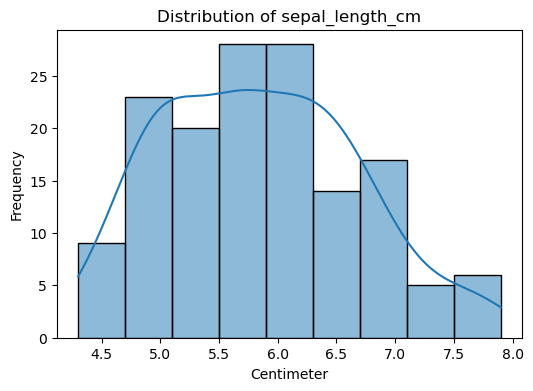

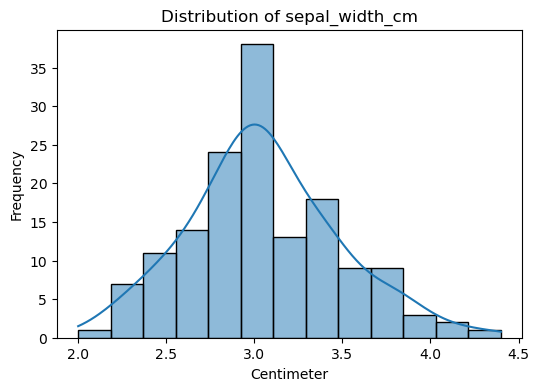

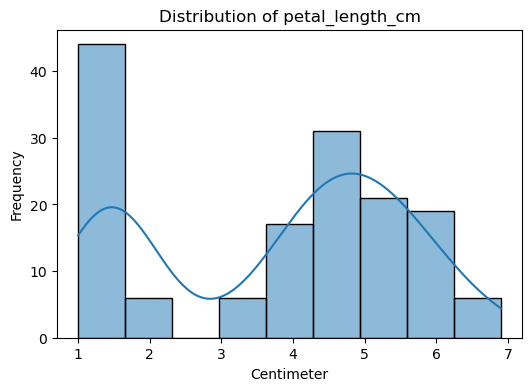

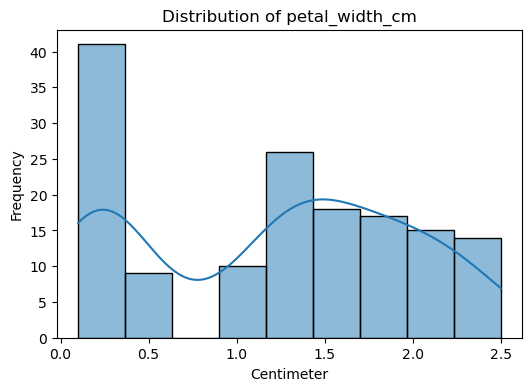

In [31]:
for column in data.columns[:-1]: # the last column is not numeric so it is excluded
    if pd.api.types.is_numeric_dtype(data[column]): # checking if the column is numeric
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], kde=True) 
        plt.title(f"Distribution of {column}") 
        plt.xlabel("Centimeter")
        plt.ylabel("Frequency")
        plt.show()

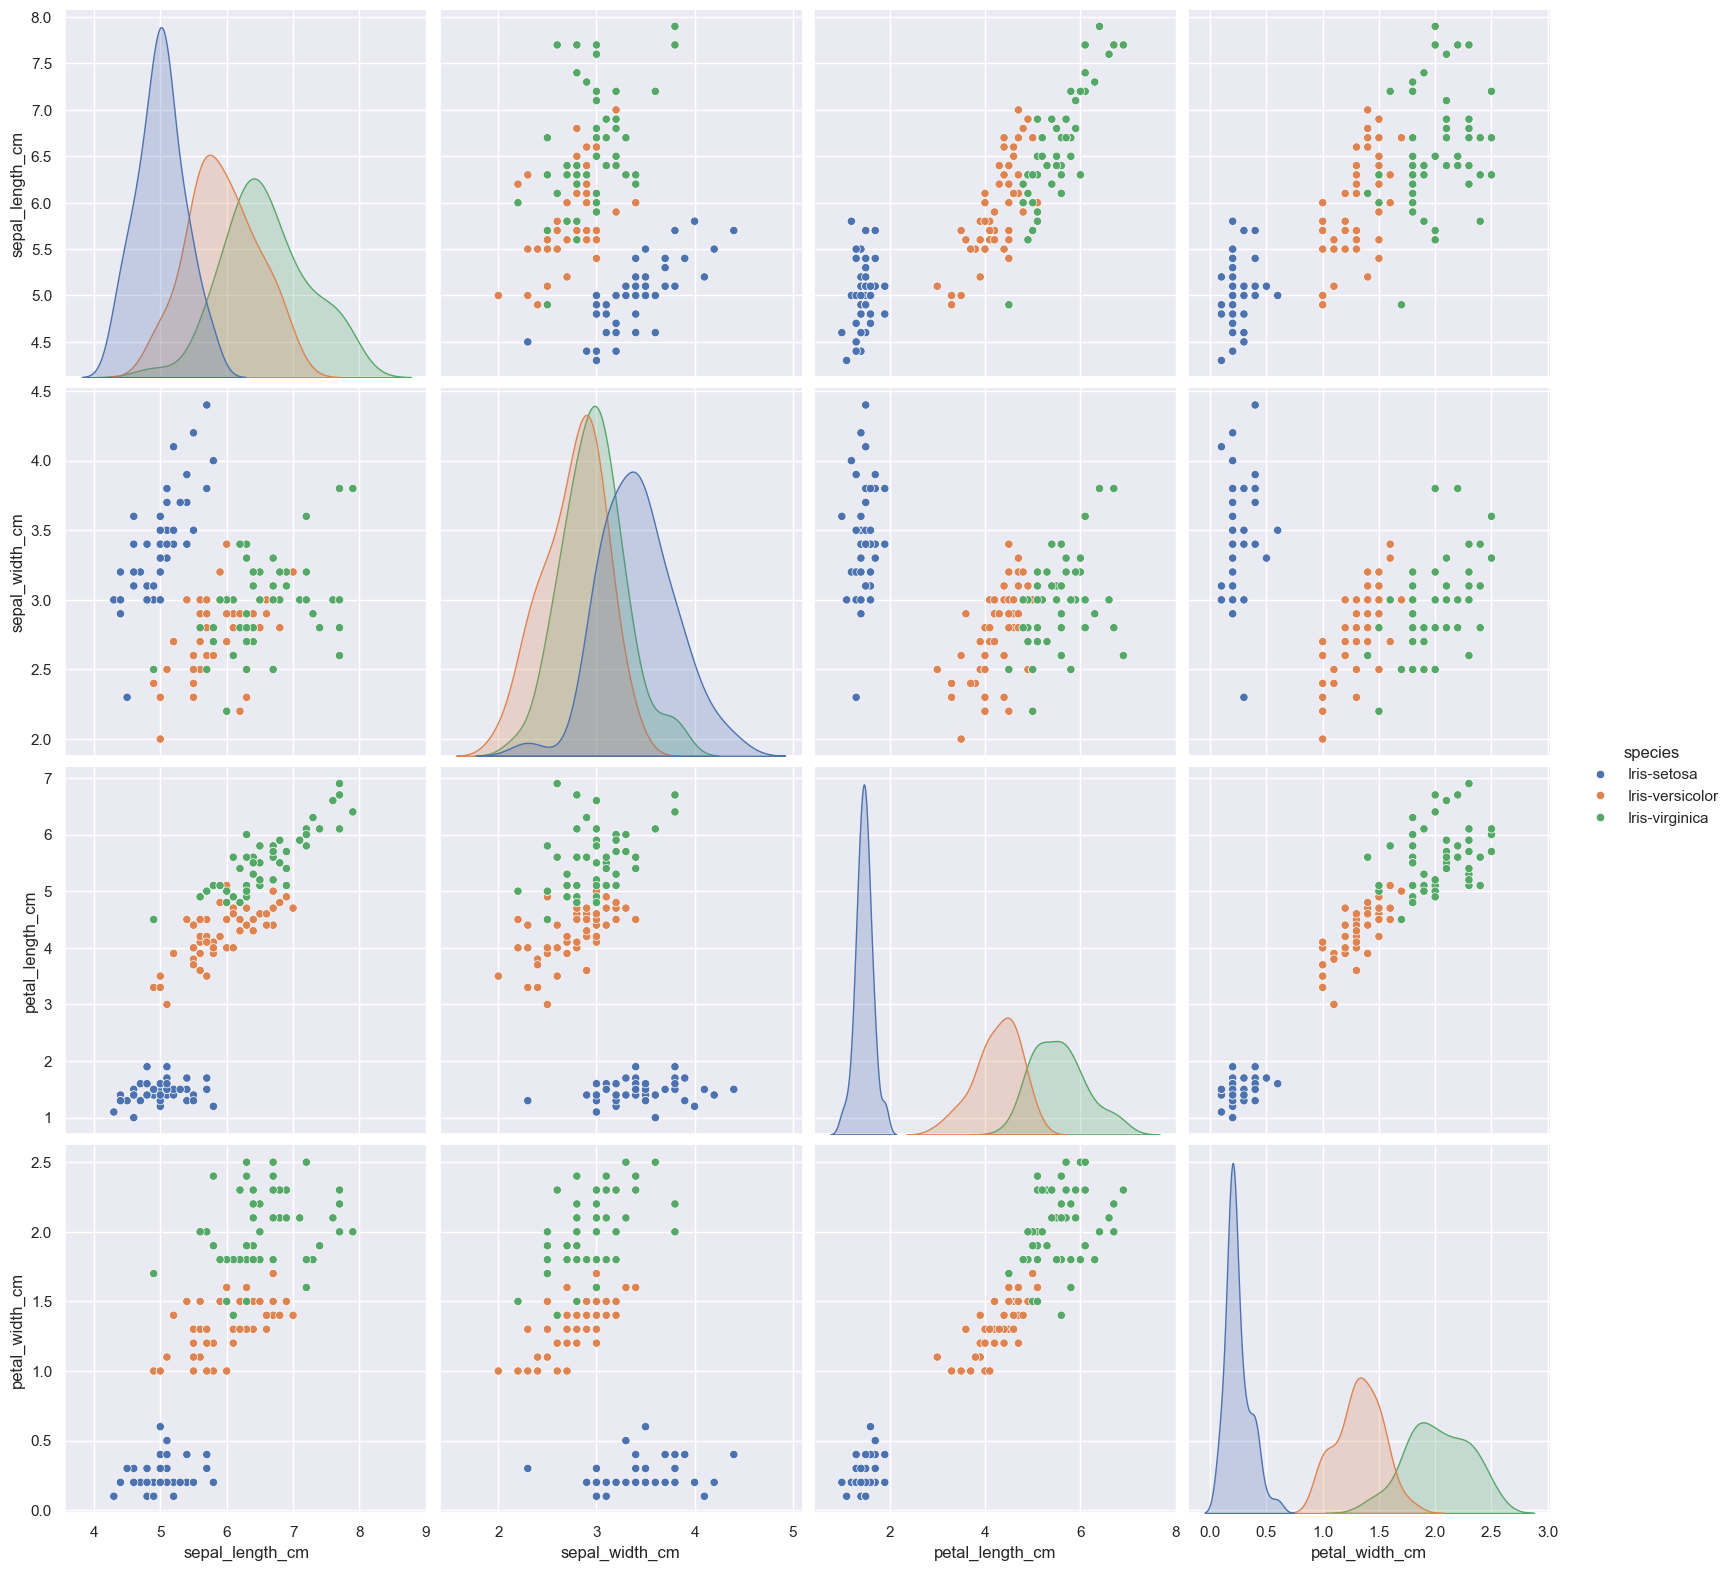

In [45]:
numeric_columns = data.select_dtypes(include=[np.number]).columns # selecting the numeric columns
sns.pairplot(data, vars=numeric_columns, hue='species', height=4)     # plotting the pairplot
plt.show()

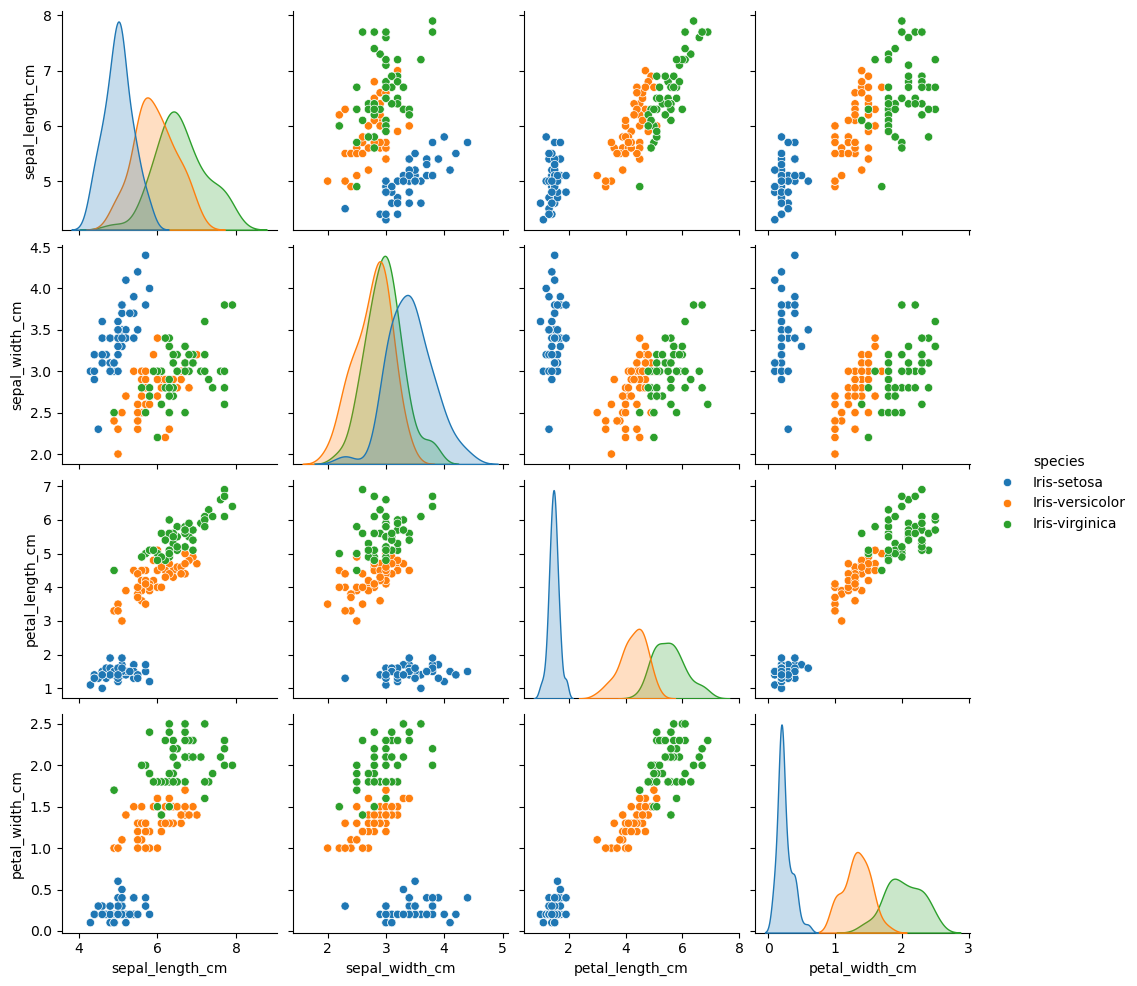

In [9]:
sns.pairplot(data, 
             vars=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm'], 
             hue='species',
             )

plt.show()

In [52]:
data_corr = data[numeric_columns].corr() # correlation matrix
print(data_corr)

                 sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm         1.000000       -0.109369         0.871754   
sepal_width_cm         -0.109369        1.000000        -0.420516   
petal_length_cm         0.871754       -0.420516         1.000000   
petal_width_cm          0.817954       -0.356544         0.962757   

                 petal_width_cm  
sepal_length_cm        0.817954  
sepal_width_cm        -0.356544  
petal_length_cm        0.962757  
petal_width_cm         1.000000  


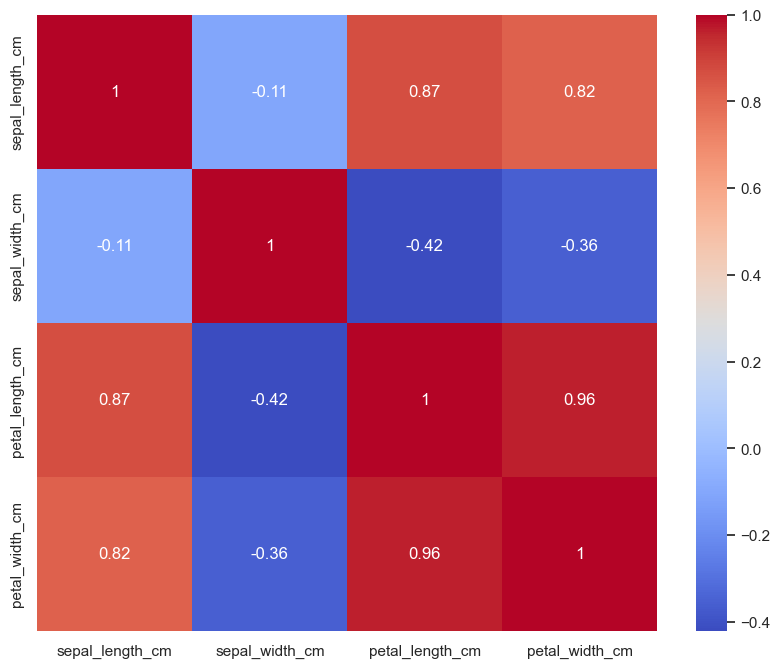

In [56]:
sns.heatmap(data_corr, annot=True, cmap='coolwarm') # heatmap of the correlation matrix
plt.show()